In [1]:
from netCDF4 import Dataset

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import seaborn as sns

from mpl_toolkits.basemap import Basemap

import rasterio as rio
import geopandas as gpd

# Downloading the NetCDF files from ECMWF Server
Each NetCDF file consists of 'total precipitation' data for each month in a year. We will download the files for the years 1979 to 2019(August)

In [1]:
from ecmwfapi import ECMWFDataServer
server = ECMWFDataServer(url="xxx",
                         key="yyy",
                         email="zzz")

In [43]:
dates = []
s = "19790101/19790201/19790301/19790401/19790501/19790601/19790701/19790801/19790901/19791001/19791101/19791201"
ls = list(s)

In [44]:
for i in range(1979,2019):
    i = str(i)
    ls[:4] = i
    ls[9:13] = i
    ls[18:22] = i
    ls[27:31] = i
    ls[36:40] = i
    ls[45:49] = i
    ls[54:58] = i
    ls[63:67] = i
    ls[72:76] = i
    ls[81:85] = i
    ls[90:94] = i
    ls[99:103] = i
    
    dates.append("".join(ls))

In [50]:
dates.append("20190101/20190201/20190301/20190401/20190501/20190601/20190701/20190801")
dates[40]

'20190101/20190201/20190301/20190401/20190501/20190601/20190701/20190801'

In [53]:
for i in dates:
    server.retrieve({"class": "ei",
                     "dataset": "interim",
                     "date": i,
                     "expver": "1",
                     "grid": "0.75/0.75",
                     "levtype": "sfc",
                     "param": "228.128",
                     "step": "0-12",
                     "stream": "mdfa",
                     "format": "netcdf",
                     "type": "fc",
                     "target": str(i)[:4]+".nc"})

2020-07-20 11:15:00 ECMWF API python library 1.5.4
2020-07-20 11:15:00 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:15:01 Welcome Sai Krishna Dammalapati
2020-07-20 11:15:02 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:15:03 Request submitted
2020-07-20 11:15:03 Request id: 5f152f5fc83a373590a8dc11
2020-07-20 11:15:03 Request is submitted
Calling 'nice mars /tmp/20200720-0540/91/tmp-_marsWe2Q7_.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.054503 - Welcome to MARS
mars - INFO   - 20200720.054503 - MARS Client bundle version: 6.28.4.0
mars - INFO   - 20200720.054503 - MARS Client package version: 6.28.4

2020-07-20 11:15:26 Transfer rate 469.878 Kbytes/s
2020-07-20 11:15:26 ECMWF API python library 1.5.4
2020-07-20 11:15:26 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:15:27 Welcome Sai Krishna Dammalapati
2020-07-20 11:15:28 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:15:29 Request submitted
2020-07-20 11:15:29 Request id: 5f152f7951685ef7777fc513
2020-07-20 11:15:29 Request is submitted
2020-07-20 11:15:30 Request is active
Calling 'nice mars /tmp/20200720-0540/05/tmp-_marseNXxR8.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.054529 - Welcome to MARS
mars - INFO   - 20200720.054529 - MARS Client bundl

2020-07-20 11:15:52 Transfer rate 673.025 Kbytes/s
2020-07-20 11:15:53 ECMWF API python library 1.5.4
2020-07-20 11:15:53 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:15:53 Welcome Sai Krishna Dammalapati
2020-07-20 11:15:54 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:15:55 Request submitted
2020-07-20 11:15:55 Request id: 5f152f936a6b1b1661a8dc0b
2020-07-20 11:15:55 Request is submitted
2020-07-20 11:15:56 Request is active
Calling 'nice mars /tmp/20200720-0540/61/tmp-_marsaVbZC4.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.054555 - Welcome to MARS
mars - INFO   - 20200720.054555 - MARS Client bundl

2020-07-20 11:16:20 Transfer rate 1.02539 Mbytes/s
2020-07-20 11:16:21 ECMWF API python library 1.5.4
2020-07-20 11:16:21 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:16:22 Welcome Sai Krishna Dammalapati
2020-07-20 11:16:22 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:16:23 Request submitted
2020-07-20 11:16:23 Request id: 5f152faf6a6b1b1661a8dc0c
2020-07-20 11:16:23 Request is submitted
2020-07-20 11:16:25 Request is active
Calling 'nice mars /tmp/20200720-0540/31/tmp-_marsVXfSgs.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.054624 - Welcome to MARS
mars - INFO   - 20200720.054624 - MARS Client bundl

2020-07-20 11:16:49 Transfer rate 1.09274 Mbytes/s
2020-07-20 11:16:50 ECMWF API python library 1.5.4
2020-07-20 11:16:50 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:16:51 Welcome Sai Krishna Dammalapati
2020-07-20 11:16:51 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:16:52 Request submitted
2020-07-20 11:16:52 Request id: 5f152fcc0ff544de536a219b
2020-07-20 11:16:52 Request is submitted
2020-07-20 11:16:54 Request is active
Calling 'nice mars /tmp/20200720-0540/97/tmp-_marsF86Z8k.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.054653 - Welcome to MARS
mars - INFO   - 20200720.054653 - MARS Client bundl

2020-07-20 11:17:21 Transfer rate 434.021 Kbytes/s
2020-07-20 11:17:23 ECMWF API python library 1.5.4
2020-07-20 11:17:23 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:17:24 Welcome Sai Krishna Dammalapati
2020-07-20 11:17:24 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:17:25 Request submitted
2020-07-20 11:17:25 Request id: 5f152fed42d679b583a8dc0a
2020-07-20 11:17:25 Request is submitted
Calling 'nice mars /tmp/20200720-0540/95/tmp-_marsmYSPbS.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.054726 - Welcome to MARS
mars - INFO   - 20200720.054726 - MARS Client bundle version: 6.28.4.0
mars - INFO   - 20

2020-07-20 11:17:40 Transfer rate 577.371 Kbytes/s
2020-07-20 11:17:41 ECMWF API python library 1.5.4
2020-07-20 11:17:41 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:17:42 Welcome Sai Krishna Dammalapati
2020-07-20 11:17:43 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:17:43 Request submitted
2020-07-20 11:17:43 Request id: 5f152fff3345acf9957fc516
2020-07-20 11:17:43 Request is submitted
2020-07-20 11:17:45 Request is active
Calling 'nice mars /tmp/20200720-0540/ea/tmp-_marsCgc_yp.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.054745 - Welcome to MARS
mars - INFO   - 20200720.054745 - MARS Client bundl

2020-07-20 11:18:17 Transfer rate 396.352 Kbytes/s
2020-07-20 11:18:18 ECMWF API python library 1.5.4
2020-07-20 11:18:18 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:18:18 Welcome Sai Krishna Dammalapati
2020-07-20 11:18:19 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:18:20 Request submitted
2020-07-20 11:18:20 Request id: 5f15302487be809ad0a70671
2020-07-20 11:18:20 Request is submitted
Calling 'nice mars /tmp/20200720-0540/19/tmp-_marslRnuvI.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.054820 - Welcome to MARS
mars - INFO   - 20200720.054820 - MARS Client bundle version: 6.28.4.0
mars - INFO   - 20

2020-07-20 11:18:43 Transfer rate 473.891 Kbytes/s
2020-07-20 11:18:44 ECMWF API python library 1.5.4
2020-07-20 11:18:44 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:18:44 Welcome Sai Krishna Dammalapati
2020-07-20 11:18:45 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:18:46 Request submitted
2020-07-20 11:18:46 Request id: 5f15303e87a000ee907fc514
2020-07-20 11:18:46 Request is submitted
2020-07-20 11:18:47 Request is active
Calling 'nice mars /tmp/20200720-0540/08/tmp-_marsmnhRqC.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.054846 - Welcome to MARS
mars - INFO   - 20200720.054846 - MARS Client bundl

2020-07-20 11:19:14 Transfer rate 654.96 Kbytes/s
2020-07-20 11:19:15 ECMWF API python library 1.5.4
2020-07-20 11:19:15 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:19:16 Welcome Sai Krishna Dammalapati
2020-07-20 11:19:17 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:19:17 Request submitted
2020-07-20 11:19:17 Request id: 5f15305d5afb278d7fa8dc07
2020-07-20 11:19:17 Request is submitted
Calling 'nice mars /tmp/20200720-0540/2c/tmp-_marsOIwG_5.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.054918 - Welcome to MARS
mars - INFO   - 20200720.054918 - MARS Client bundle version: 6.28.4.0
mars - INFO   - 202

2020-07-20 11:19:39 Transfer rate 449.231 Kbytes/s
2020-07-20 11:19:40 ECMWF API python library 1.5.4
2020-07-20 11:19:40 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:19:40 Welcome Sai Krishna Dammalapati
2020-07-20 11:19:41 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:19:42 Request submitted
2020-07-20 11:19:42 Request id: 5f15307675ebada72d7fc515
2020-07-20 11:19:42 Request is submitted
Calling 'nice mars /tmp/20200720-0540/61/tmp-_mars86pEAR.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.054942 - Welcome to MARS
mars - INFO   - 20200720.054942 - MARS Client bundle version: 6.28.4.0
mars - INFO   - 20

2020-07-20 11:20:03 Transfer rate 554.459 Kbytes/s
2020-07-20 11:20:04 ECMWF API python library 1.5.4
2020-07-20 11:20:04 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:20:05 Welcome Sai Krishna Dammalapati
2020-07-20 11:20:06 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:20:07 Request submitted
2020-07-20 11:20:07 Request id: 5f15308f543ae179286a2198
2020-07-20 11:20:07 Request is submitted
Calling 'nice mars /tmp/20200720-0550/de/tmp-_marsmwcRH6.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.055008 - Welcome to MARS
mars - INFO   - 20200720.055008 - MARS Client bundle version: 6.28.4.0
mars - INFO   - 20

2020-07-20 11:20:27 Transfer rate 485.186 Kbytes/s
2020-07-20 11:20:28 ECMWF API python library 1.5.4
2020-07-20 11:20:28 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:20:28 Welcome Sai Krishna Dammalapati
2020-07-20 11:20:29 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:20:30 Request submitted
2020-07-20 11:20:30 Request id: 5f1530a6c05c64cd6e6a21a8
2020-07-20 11:20:30 Request is submitted
2020-07-20 11:20:32 Request is active
Calling 'nice mars /tmp/20200720-0550/e3/tmp-_marsgUQ5Pf.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.055031 - Welcome to MARS
mars - INFO   - 20200720.055031 - MARS Client bundl

2020-07-20 11:20:58 Transfer rate 483.871 Kbytes/s
2020-07-20 11:20:59 ECMWF API python library 1.5.4
2020-07-20 11:20:59 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:21:00 Welcome Sai Krishna Dammalapati
2020-07-20 11:21:01 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:21:02 Request submitted
2020-07-20 11:21:02 Request id: 5f1530c61eb9244d3c6a2197
2020-07-20 11:21:02 Request is submitted
Calling 'nice mars /tmp/20200720-0550/36/tmp-_marsmOrBLB.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.055102 - Welcome to MARS
mars - INFO   - 20200720.055102 - MARS Client bundle version: 6.28.4.0
mars - INFO   - 20

2020-07-20 11:21:24 Transfer rate 393.499 Kbytes/s
2020-07-20 11:21:25 ECMWF API python library 1.5.4
2020-07-20 11:21:25 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:21:27 Welcome Sai Krishna Dammalapati
2020-07-20 11:21:28 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:21:29 Request submitted
2020-07-20 11:21:29 Request id: 5f1530e1b5b3e850b06a219e
2020-07-20 11:21:29 Request is submitted
2020-07-20 11:21:30 Request is active
Calling 'nice mars /tmp/20200720-0550/ec/tmp-_marsTusFQ2.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.055129 - Welcome to MARS
mars - INFO   - 20200720.055129 - MARS Client bundl

2020-07-20 11:21:57 Transfer rate 373.529 Kbytes/s
2020-07-20 11:21:58 ECMWF API python library 1.5.4
2020-07-20 11:21:58 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:21:59 Welcome Sai Krishna Dammalapati
2020-07-20 11:22:01 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:22:02 Request submitted
2020-07-20 11:22:02 Request id: 5f1531021eb9244d3c6a2198
2020-07-20 11:22:02 Request is submitted
Calling 'nice mars /tmp/20200720-0550/5d/tmp-_mars9Z6RWz.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.055202 - Welcome to MARS
mars - INFO   - 20200720.055202 - MARS Client bundle version: 6.28.4.0
mars - INFO   - 20

2020-07-20 11:22:23 Transfer rate 437.401 Kbytes/s
2020-07-20 11:22:24 ECMWF API python library 1.5.4
2020-07-20 11:22:24 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:22:25 Welcome Sai Krishna Dammalapati
2020-07-20 11:22:26 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:22:27 Request submitted
2020-07-20 11:22:27 Request id: 5f15311bb0c1fd0810a8dc05
2020-07-20 11:22:27 Request is submitted
2020-07-20 11:22:28 Request is active
Calling 'nice mars /tmp/20200720-0550/55/tmp-_marstJmzJR.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.055227 - Welcome to MARS
mars - INFO   - 20200720.055227 - MARS Client bundl

2020-07-20 11:22:53 Transfer rate 451.638 Kbytes/s
2020-07-20 11:22:54 ECMWF API python library 1.5.4
2020-07-20 11:22:54 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:22:55 Welcome Sai Krishna Dammalapati
2020-07-20 11:22:56 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:22:56 Request submitted
2020-07-20 11:22:56 Request id: 5f153138335062fc40a8dc0a
2020-07-20 11:22:56 Request is submitted
Calling 'nice mars /tmp/20200720-0550/80/tmp-_marseAOhdK.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.055257 - Welcome to MARS
mars - INFO   - 20200720.055257 - MARS Client bundle version: 6.28.4.0
mars - INFO   - 20

2020-07-20 11:23:21 Transfer rate 529.246 Kbytes/s
2020-07-20 11:23:21 ECMWF API python library 1.5.4
2020-07-20 11:23:21 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:23:22 Welcome Sai Krishna Dammalapati
2020-07-20 11:23:23 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:23:23 Request submitted
2020-07-20 11:23:23 Request id: 5f153153543ae179286a219a
2020-07-20 11:23:23 Request is submitted
2020-07-20 11:23:25 Request is active
Calling 'nice mars /tmp/20200720-0550/04/tmp-_marsJ0uYO6.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.055324 - Welcome to MARS
mars - INFO   - 20200720.055324 - MARS Client bundl

2020-07-20 11:23:50 Transfer rate 512.574 Kbytes/s
2020-07-20 11:23:51 ECMWF API python library 1.5.4
2020-07-20 11:23:51 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:23:51 Welcome Sai Krishna Dammalapati
2020-07-20 11:23:52 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:23:53 Request submitted
2020-07-20 11:23:53 Request id: 5f1531715afb278d7fa8dc10
2020-07-20 11:23:53 Request is submitted
Calling 'nice mars /tmp/20200720-0550/08/tmp-_mars_y5IY7.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.055354 - Welcome to MARS
mars - INFO   - 20200720.055354 - MARS Client bundle version: 6.28.4.0
mars - INFO   - 20

2020-07-20 11:24:11 Transfer rate 526.851 Kbytes/s
2020-07-20 11:24:11 ECMWF API python library 1.5.4
2020-07-20 11:24:11 ECMWF API at https://api.ecmwf.int/v1
2020-07-20 11:24:12 Welcome Sai Krishna Dammalapati
2020-07-20 11:24:13 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-07-20 11:24:14 Request submitted
2020-07-20 11:24:14 Request id: 5f153186dfcb567c936a2198
2020-07-20 11:24:14 Request is submitted
Calling 'nice mars /tmp/20200720-0550/7b/tmp-_marsxxawKn.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20200720.055415 - Welcome to MARS
mars - INFO   - 20200720.055415 - MARS Client bundle version: 6.28.4.0
mars - INFO   - 20

# Working with NetCDF Files:

In [2]:
fh = Dataset("RainfallData/2019.nc", mode='r')

In [3]:
fh.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (480,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (241,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: time
 current shape = (8,)
 filling on, default _FillValue of -2147483647 used,
 'tp': <class 'netCDF4._netCDF4.Variable'>
 int16 tp(time, latitude, longitude)
     scale_factor: 1.0053505331407718e-06
     add_offset: 0.03294131552593416
     _FillValue: -32767
     missing_value: -32767
     units: m
     long_name: Total precipitation
 

In [4]:
fh.variables.keys()

dict_keys(['longitude', 'latitude', 'time', 'tp'])

In [5]:
# Access all data values
#lons = fh.variables['longitude'][:]
#lats = fh.variables['latitude'][:]
#times = fh.variables['time'][:]
#tps = fh.variables['tp'][:]
#tps_units = fh.variables['tp'].units

In [6]:
# Clipping NetCDF values within a bounding box
lats = fh.variables['latitude'][:] 
lons = fh.variables['longitude'][:]
lat_bnds, lon_bnds = [-2, 39], [42, 106]

# latitude lower and upper index
latli = np.argmin( np.abs( lats - lat_bnds[0] ) )
latui = np.argmin( np.abs( lats - lat_bnds[1] ) ) 

# longitude lower and upper index
lonli = np.argmin( np.abs( lons - lon_bnds[0] ) )
lonui = np.argmin( np.abs( lons - lon_bnds[1] ) )  


tps = fh.variables['tp'][ : , latui:latli , lonli:lonui ] 

In [7]:
# Create a Basemap to plot the precipitation data.
mp = Basemap(projection='merc',
             llcrnrlon = 42.8,
             llcrnrlat = -2, 
             urcrnrlon = 105.37,
             urcrnrlat = 38.78,
             resolution = 'i')

In [8]:
lon, lat = np.meshgrid(lons[lonli:lonui], lats[latui:latli])
x, y = mp(lon, lat)

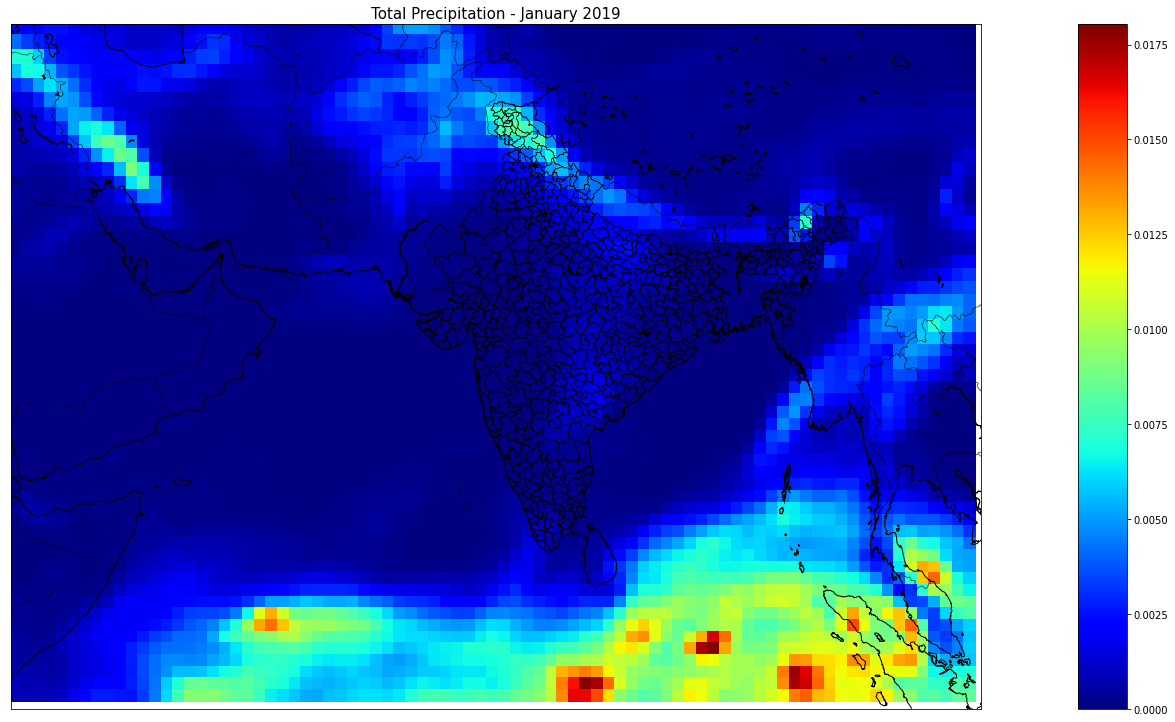

In [9]:
plt.figure(figsize=(20,20))
c_scheme = mp.pcolor(x,y,np.squeeze(tps[0,:,:]), cmap='jet')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
cbar = mp.colorbar(c_scheme, location='right', pad = '10%')
plt.title('Total Precipitation - January 2019',fontsize='15')

# Add boundaries file to the base map
mp.readshapefile('output','latest_districts')

plt.savefig('Check.png')

## Let's create an animation using multiple files:

In [2]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, clip=False):
        self.vcenter = vcenter
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.vcenter, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [3]:
midnorm = MidpointNormalize(vmin=0, vcenter=0.01, vmax=0.04)

In [4]:
mp = Basemap(projection='merc',
             llcrnrlon = 42.8,
             llcrnrlat = -2, 
             urcrnrlon = 105.37,
             urcrnrlat = 38.78,
             resolution = 'i')

for year in range(1979,2020):    
    
    print(year)
    fh = Dataset("RainfallData/"+str(year)+".nc", mode='r')
    times = fh.variables['time'][:]
    tps_units = fh.variables['tp'].units
    
    # Clipping NetCDF values within a bounding box\
    lats = fh.variables['latitude'][:] 
    lons = fh.variables['longitude'][:]
    lat_bnds, lon_bnds = [-2, 39], [42, 106]
    # latitude lower and upper index
    latli = np.argmin( np.abs( lats - lat_bnds[0] ) )
    latui = np.argmin( np.abs( lats - lat_bnds[1] ) ) 
    # longitude lower and upper index
    lonli = np.argmin( np.abs( lons - lon_bnds[0] ) )
    lonui = np.argmin( np.abs( lons - lon_bnds[1] ) )  


    tps = fh.variables['tp'][ : , latui:latli , lonli:lonui ] 
    
    
    lon, lat = np.meshgrid(lons[lonli:lonui], lats[latui:latli])
    x, y = mp(lon, lat)
    
    for month in range(12):
        try:
            plt.figure(figsize=(20,20))
            c_scheme = mp.pcolor(x,y,np.squeeze(tps[month,:,:]), 
                             cmap='RdBu', norm = midnorm)
            mp.drawcoastlines()
            mp.drawstates()
            mp.drawcountries()
            cbar = mp.colorbar(c_scheme, location='right', pad = '10%')
            monthh = month+1
            plt.title('Mean Daily rainfall in the month: '+str(monthh)+'/'+str(year),fontsize='15')
            plt.clim(0,0.04)
            plt.savefig(str(year)+'_'+str(monthh)+'.png', bbox_inches='tight')
            plt.close('all')
        except:
            pass
    

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

Use all the images on any online GIF maker!